# Credit Card Transactions Fraud Detection Exploratory Data Analysis Project 



**Overview**


Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

About The DataSet (Kaggle)

This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

In today's world, a lot of processes are carried over the Internet to make our lives easier. But, on the other hand, many unauthorized and illegitimate activities that take place over it are causing major trouble for the growth of the economy. One of them being the fraud cases that misguide people and lead to financial losses. Major frauds reported recently occur through the malicious techniques that are made to work on Credit cards that are used for financial transactions over online platforms.

![](https://i.imgur.com/nEnGgnB.png)

Here are the steps that i will follow to do Exploratory Data Analysis on Fraud Credit Card Detection Project:

1. Load the file using Pandas
2. Look at some info about the data & the columns
3. Fix any missing or incorrect values
4. Check and Explore about the Numerical Variables
5. Explore about the categorical Variables
6. Finding Relationship between features

## Download the data

I used the dataset from Kaggle and download the dataset using opendatasets.

In [1]:
!pip install opendatasets jovian --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import opendatasets as od
import jovian

dataset_url= 'https://www.kaggle.com/datasets/kartik2112/fraud-detection'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tinnandarliman
Your Kaggle Key: ··········


100%|██████████| 202M/202M [00:02<00:00, 91.5MB/s]


## Data Preparation and Cleaning

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from wordcloud import WordCloud
%matplotlib inline

In [4]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['figure.figsize']= (12,6)
matplotlib.rcParams['figure.facecolor']= '#00000000'

In [5]:
fraud_train_df= pd.read_csv('/content/fraud-detection/fraudTrain.csv')

In [ ]:
fraud_train_df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


Gain Insights Into Underlying Trends and Patterns EDA assists data analysts in identifying crucial trends quickly through data visualizations using various graphs, such as box plots and histograms. Businesses also expect to make some unexpected discoveries in the data while performing EDA, which can help improve certain existing business strategies.

In [ ]:
fraud_train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
fraud_train_df.shape

(1296675, 23)

In [ ]:
fraud_train_df.size

29823525

Make Data-driven Decisions The most significant advantage of employing EDA in an organization is that it helps businesses to improve their understanding of data. With EDA, they can use the available tools to extract critical insights and make conclusions, which assist in making decisions based on the insights from the EDA.

In [ ]:
fraud_train_df.info

<bound method DataFrame.info of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutman

In [ ]:
fraud_train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
numerics= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df= fraud_train_df.select_dtypes(include= numerics)
len(numeric_df.columns)

11

In [ ]:
fraud_train_df.isna()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296671,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296672,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296673,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Percentage of missing values per column

In [ ]:
fraud_train_df.isna().sum().sort_values(ascending= False)

Unnamed: 0               0
zip                      0
merch_long               0
merch_lat                0
unix_time                0
trans_num                0
dob                      0
job                      0
city_pop                 0
long                     0
lat                      0
state                    0
trans_date_trans_time    0
city                     0
street                   0
gender                   0
last                     0
first                    0
amt                      0
category                 0
merchant                 0
cc_num                   0
is_fraud                 0
dtype: int64

## Exploratory Analysis and Visualization

### Gender vs. Fraud Claims

I want to check any relationship between gender vs. fraud claim charges.

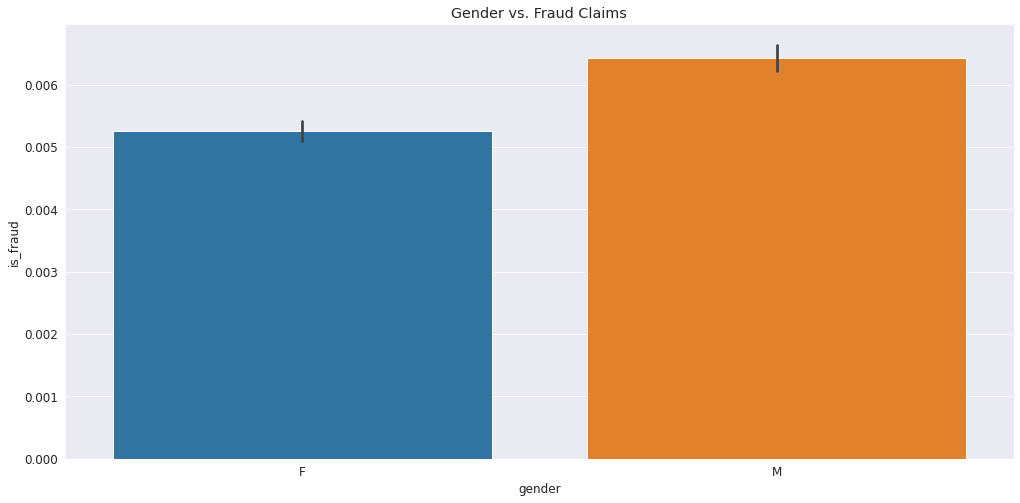

In [7]:
plt.figure(figsize=(17,8))
sns.barplot(x='gender', y='is_fraud', data=fraud_train_df).set(title='Gender vs. Fraud Claims');

Conclusion:

Male happened to use credit card more than female based on this bar graph. It could be that most of the female don't report the fraud claims.

### Average amount spent 

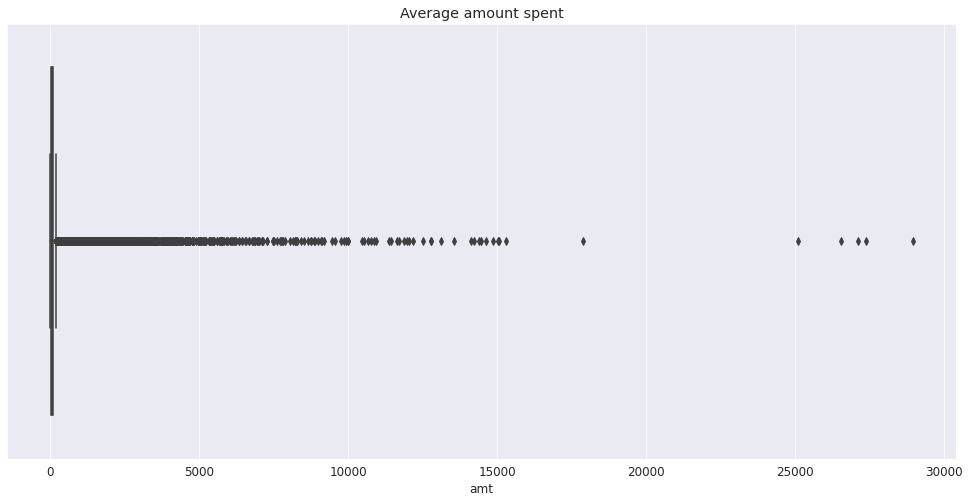

In [35]:
plt.figure(figsize=(17,8))
sns.boxplot(x='amt',data= fraud_train_df).set(title='Average amount spent');

Conclusion:

I can see very few charges more than $30,000. 
Mostly, people spend less than $1,000 on the daily basic.

### Comparison on Shopping Category

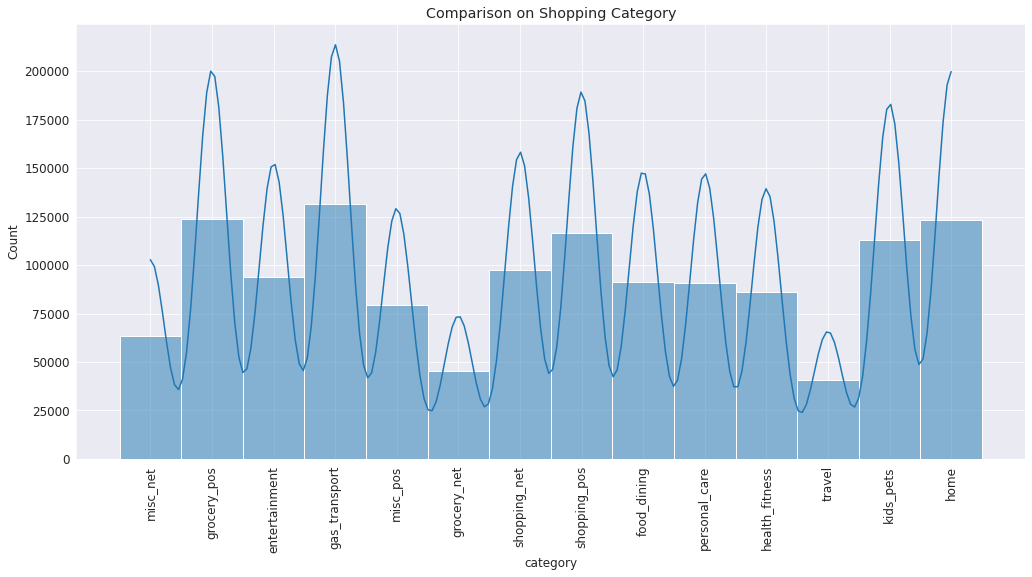

In [10]:
plt.figure(figsize=(17,8))
sns.histplot(fraud_train_df['category'],kde=True).set(title='Comparison on Shopping Category')
plt.xticks(rotation=90);

Conclusion:

People mostly shop daily on grocery, home and gas(transportation) categories. That makes sense because of the basic human needs will always be fooods and transportation.

### Fraud Claim Counts on Population Counts

<ipython-input-37-088785a5ed3f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud_train_df['city_pop'], kde=True, bins=15).set(title='Fraud Claim Charges on Population Counts');


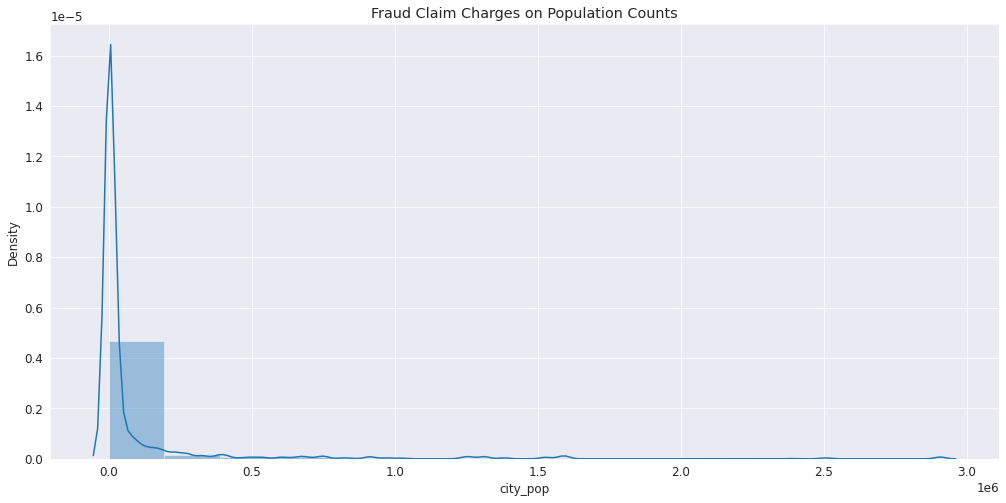

In [37]:
plt.figure(figsize=(17,8))
sns.distplot(fraud_train_df['city_pop'], kde=True, bins=15).set(title='Fraud Claim Charges on Population Counts');

Conclusion:

It is interesting to see City population on fraud claims. I don't think the city population affects how people use their credit card.

### Fraud Claim Counts per Category

Creating new columns called 'fraud_claim_counts' to check and see any outliers (unusual) charges based on its category.

In [31]:
fraud_train_df.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

There are 7506 fraud credit card claims reported across all the category. It seems like there should be a way to detect the fraud charges easily.

In [32]:
counts= fraud_train_df.groupby(['category', 'amt', 'is_fraud']).size().reset_index().rename(columns={0:'fraud_claim_counts'})

In [33]:
counts

,category,amt,is_fraud,fraud_claim_counts
0,entertainment,1.00,0,6
1,entertainment,1.01,0,19
2,entertainment,1.02,0,22
3,entertainment,1.03,0,24
4,entertainment,1.04,0,32
...,...,...,...,...
241774,travel,25086.94,0,1
241775,travel,26544.12,0,1
241776,travel,27119.77,0,1
241777,travel,27390.12,0,1


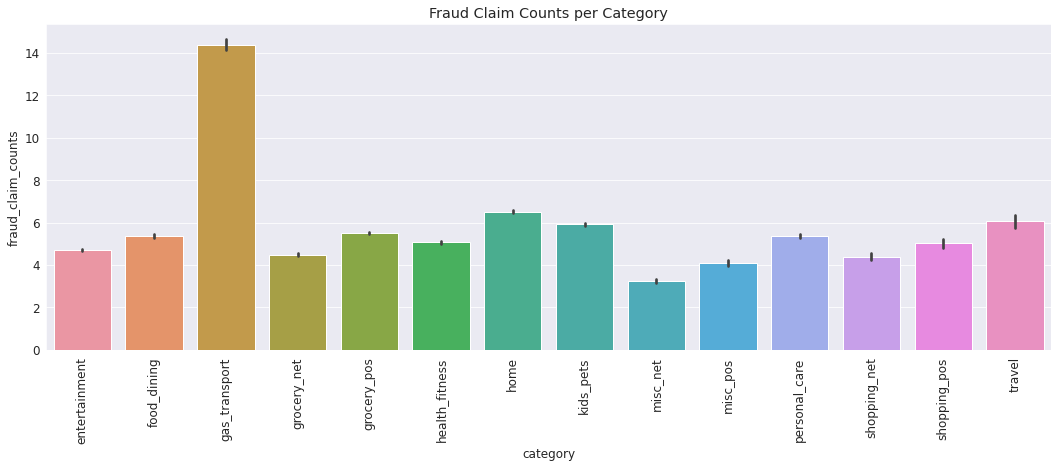

In [34]:
matplotlib.rcParams['figure.figsize']= (18,6)
sns.barplot(x= 'category', y= 'fraud_claim_counts', data= counts).set(title='Fraud Claim Counts per Category')
plt.xticks(rotation=90)
plt.show();

Conclusion:

The most fraud charges that usually people gets are entertainment and online shopping websites. At present, there is no technological solution similar to an EMV microchip that can significantly reduce card-not-present fraud.

Instead, the burden is on both credit card issuers and merchants to employ stronger digital security measures to identify and block fraudulent transactions in real-time.

**Columns to use for analysis**

I don't see any missing values in the dataset. So, i will go ahead and select the columns that i will be using in the project!

Columns that will be going to use for the project:

* category
* amount
* city_population
* long
* lat
* job
* gender
* is_fraud

In [ ]:
cols_to_use= ['category', 'amt','city_pop', 'long', 'lat', 'job','gender','is_fraud']
cols_df= fraud_train_df[cols_to_use]
cols_df

,category,amt,city_pop,long,lat,job,gender,is_fraud
0,misc_net,4.97,3495,-81.1781,36.0788,"Psychologist, counselling",F,0
1,grocery_pos,107.23,149,-118.2105,48.8878,Special educational needs teacher,F,0
2,entertainment,220.11,4154,-112.2620,42.1808,Nature conservation officer,M,0
3,gas_transport,45.00,1939,-112.1138,46.2306,Patent attorney,M,0
4,misc_pos,41.96,99,-79.4629,38.4207,Dance movement psychotherapist,M,0
...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,258,-112.4777,37.7175,Geoscientist,M,0
1296671,food_dining,51.70,100,-77.5101,39.2667,"Production assistant, television",M,0
1296672,food_dining,105.93,899,-105.8189,32.9396,Naval architect,M,0
1296673,food_dining,74.90,1126,-102.5411,43.3526,Volunteer coordinator,M,0


In [ ]:
cols_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 8 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   category  1296675 non-null  object 
 1   amt       1296675 non-null  float64
 2   city_pop  1296675 non-null  int64  
 3   long      1296675 non-null  float64
 4   lat       1296675 non-null  float64
 5   job       1296675 non-null  object 
 6   gender    1296675 non-null  object 
 7   is_fraud  1296675 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 79.1+ MB


Improved Understanding of Variables Data analysts can significantly improve their comprehension of many factors related to the dataset. Using EDA, they can extract various information such as averages, means, minimum and maximum, and more such information is required for preprocessing the data appropriately.

In [ ]:
cols_df.describe()

,amt,city_pop,long,lat,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,8.882444e+04,-9.022634e+01,3.853762e+01,5.788652e-03
std,1.603160e+02,3.019564e+05,1.375908e+01,5.075808e+00,7.586269e-02
min,1.000000e+00,2.300000e+01,-1.656723e+02,2.002710e+01,0.000000e+00
25%,9.650000e+00,7.430000e+02,-9.679800e+01,3.462050e+01,0.000000e+00
50%,4.752000e+01,2.456000e+03,-8.747690e+01,3.935430e+01,0.000000e+00
75%,8.314000e+01,2.032800e+04,-8.015800e+01,4.194040e+01,0.000000e+00
max,2.894890e+04,2.906700e+06,-6.795030e+01,6.669330e+01,1.000000e+00


In [ ]:
cols_df[cols_to_use].nunique()

category       14
amt         52928
city_pop      879
long          969
lat           968
job           494
gender          2
is_fraud        2
dtype: int64

Looking for duplicate

In [ ]:
cols_df.duplicated().sum()

23886

## Ask & answer questions about the data

### Gender vs. Shopping Category

The first question that pop-up in my mind would be the shopping behavior between gender. 

**Q1.What will be the relationship between the gender and the amount for the credit usage?**

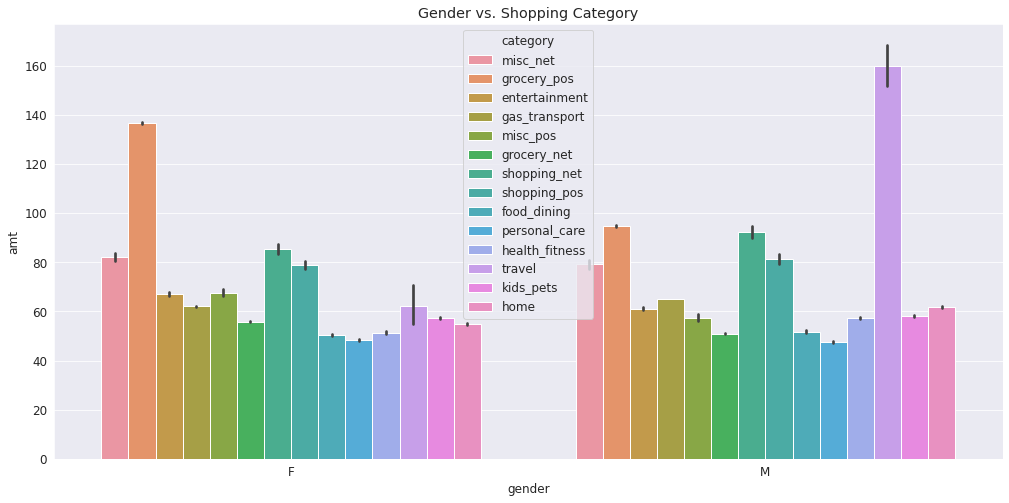

In [ ]:
plt.figure(figsize=(17,8))
sns.barplot(x='gender', y='amt', data=cols_df, hue= 'category').set(title='Gender vs. Shopping Category');

**Insights:**

It is easy to tell the category that most of the man and women mostly shop seems ways different.
Women shop grocery and miscellaneous category compares to men.
They both shop on online miscellaneous category however, men shop for Travel category a lot higher than women.

The credit usages vary between men vs. women depends on category that they shop but I can see there are fraud charges on every categories.

With digital crime and online fraud of all kinds on the rise, it’s more important than ever for organizations to take firm and clear steps to prevent payment card fraud through advanced technology and strong security measures.

### Fraud Claims Per Category

**Q2.Which category has the highest percentage of sales?**

In [ ]:
fig= px.sunburst(cols_df, 
               path= ['gender', 'category'],
               values= 'city_pop',
               color= 'is_fraud',
               title=' Fraud Claims Per Category',
               color_continuous_scale= 'RdBu')
fig.show();

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)


**Insights:**

People spent a lot of dollars $$ amount on online shopping miscellaneous category(shopping_net category and misc_net categories). 
There are a lot of fake online website nowadays that can easily get scamed by that. 


### Highest Percentage on Shopping Category

**Q3.Which category has the highest percentage of fraud claims?**

In [ ]:
fig= px.treemap(cols_df, 
               path= ['category','is_fraud','gender'],
               values= 'is_fraud',
               color= 'category',
                title='Highest Percentage on Shopping Category vs. Fraud Claims',
               color_continuous_scale= 'RdBu')
fig.show();

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



**Insights:**

All the category have fraud claims based on this treemap. The availability of compromised card information, coupled with a rise in online shopping, has dramatically increased card-not-present credit card fraud. 

The most fraud charges that usually people gets are entertainment and online shopping websites. At present, there is no technological solution similar to an EMV microchip that can significantly reduce card-not-present fraud.

The availability of compromised card information, coupled with a rise in online shopping, has dramatically increased card-not-present credit card fraud.

 

### Amount spent vs. Population

**Q4.Does population of the city affect the credit card usage?**

In [ ]:
fig=px.scatter(cols_df,
               x='city_pop',
               y='amt',
               color= 'is_fraud',
               opacity= 0.8,
               hover_data=['is_fraud'],
               title= 'Amount spent vs. Population')
fig.update_traces(marker_size=5)
fig.show();

Output hidden; open in https://colab.research.google.com to view.

**Insights:**

The city population doesn't really affect the credit card usage according to this scatter plot result.
Maybe most of fraud claims charges are online transcations based on the records.

There is some overlap between identity theft and credit card theft. In fact, credit card theft is one of the most common forms of identity theft.

In such cases, a fraudster uses an individual’s personal information, which is often stolen as part of a cyberattack or data breach, to open a new account that the victim does not know about. This activity is considered both identity fraud and credit card fraud.


### Fraud Claims on merchant locations

**Q5.How does the city population affect on the fraud claim reports?**

In [ ]:
cols_df.iloc[0]['city_pop']

3495

In [ ]:
m = folium.Map(location=[36, -113], zoom_start=4)
for i in range(29):
    folium.Marker(
        location=[cols_df.lat[i],cols_df.long[i]],
        popup=cols_df.city_pop[i],
         icon=folium.Icon(color="darkpurple", icon="info-sign"),
    ).add_to(m)
m

**Insights:**


In recent years, as the amount of data has exploded and the number of payment card transactions has skyrocketed, fraud detection has become largely digitized and automated. 
  

### Finding Relationship between features

**Q6. Is there any way you can tell how did someone use the credit card without having it?**

<Figure size 1440x1440 with 0 Axes>

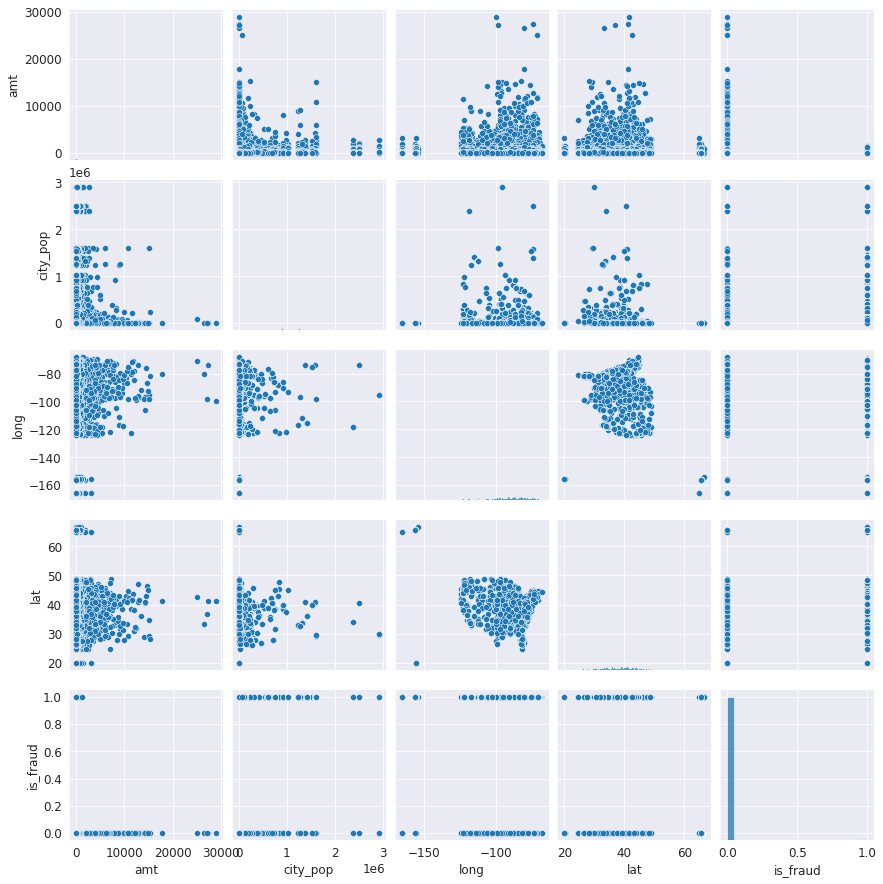

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(cols_df);

**Insights:**

When a transaction falls outside the scope of normal activity, the anomaly detection tool will then alert the card issuer and, in some cases, the user. 
Depending on the transaction details and risk score assigned to the action, these fraud detection systems may flag the purchase for review or put a hold on the transaction until the user verifies their activity.




### Relationship between Occupation and Suspicious Transcation

**Q7.Are there any suspicious transactions related to occupation?**

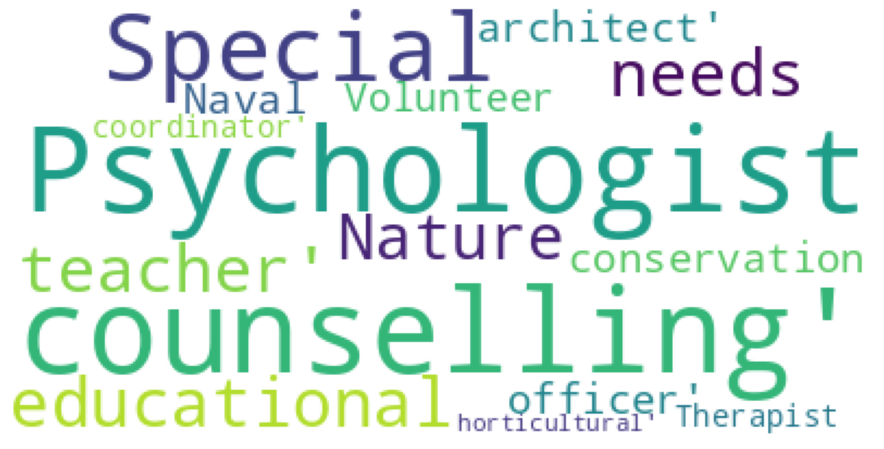

In [ ]:
plt.figure(figsize=(17,8))
text= cols_df['job'].values
wordcloud= WordCloud(background_color= 'white').generate(str(text))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

I do not personally think job occpations have any kind of affects or influence on credit usages for some reasons.

As in the case of identity theft, suspicious transactions made from a copy of an electronic or manual card will be revealed because of the information on the transaction. Classification techniques can define whether a transaction is fraudulent based on hardware, geolocation, and information about a client’s behavior patterns.

### Looking for correlation that can detect the fraud charges

**Q8. Is there any correlation between the location and the city population that cause the credit fraud?**

In [ ]:
cols_df.corr()

,amt,city_pop,long,lat,is_fraud
amt,1.000000,0.005818,-0.000187,-0.001926,0.219404
city_pop,0.005818,1.000000,-0.052715,-0.155730,0.002136
long,-0.000187,-0.052715,1.000000,-0.015533,0.001721
lat,-0.001926,-0.155730,-0.015533,1.000000,0.001894
is_fraud,0.219404,0.002136,0.001721,0.001894,1.000000


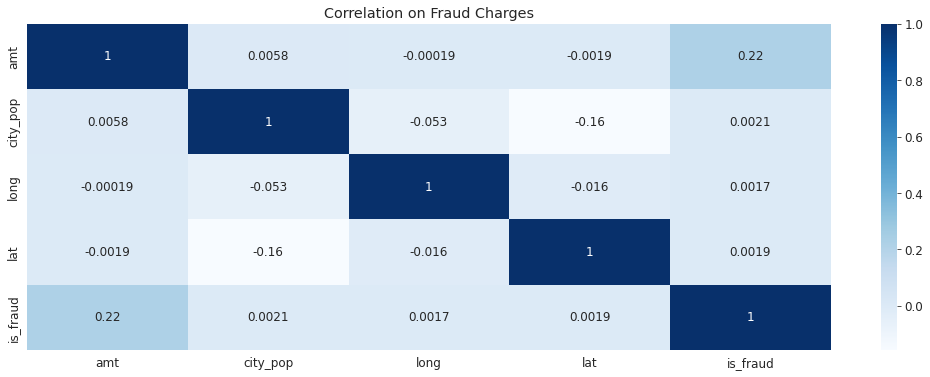

In [ ]:
sns.heatmap(cols_df.corr(),cbar=True,annot=True,cmap='Blues').set(title='Correlation on Fraud Charges');

**Insights:**

Seems like there are some correlations between city population, the amount and the location that people use the credit cards for. There is a way to detect the fraud charges using anomaly pratice.

What can be an anomaly?

* A sudden increase in spending

* Purchase of a large ticket item

* A series of rapid transactions

* Multiple transactions with the same merchant

* Transactions that originate in an unusual location or foreign country

* Transactions that occur at unusual times.


## Summary and Conclusion

Advantages of Using EDA

Here are a few advantages of using Exploratory Data Analysis - 

* Credit card fraud detection is the process of identifying purchase attempts that are fraudulent and rejecting them rather than processing the order. 


* Payment cards are easy to use because you only need to transmit a few simple numbers to the bank in order to identify your account and authorize the transaction.
    
    
    
* In order to limit the amount of revenue they lose to fraud, it's important for all merchants to have effective fraud detection measures in place. 



* This usually means employing a combination of different tools, from common checks on cardholder information to advanced risk scoring algorithms.



* Credit card fraud costs the global economy more than $24 billion per year, and the numbers keep going up. Smaller merchants suffer the most from the impact of fraud, and that’s why it’s so important to have tools and practices in place to detect fraud in its early stages.

## Future Work

Better Preprocess Data to Save Time EDA can assist data analysts in identifying significant mistakes, abnormalities, or missing values in the existing dataset. Handling the above entities is critical for any organization before beginning a full study as it ensures correct preprocessing of data and may help save a significant amount of time by avoiding mistakes later when applying machine learning models.

**Predictive modeling**

In addition to finding anomalies within a specific user account, ML models and predictive analytics can also be used to track and identify fraud patterns or point to an ongoing, nuanced fraud scheme. Predictive modeling is an important capability since cybercriminals are constantly updating their techniques to evade detection by existing tools and methods.  


* Planning to do model building to train and test the dataset as follows:
1. Decision Tree
2. KNN
3. SVM
4. Random Forest
5. Logestic Regression
6. Adaboost



## References 

* Kaggle Dataset: https://www.kaggle.com/datasets/kartik2112/fraud-detection
* Pandas Library and Tutorials: https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html
* Numpy documentation and Tutorials: https://numpy.org/doc/stable/user/quickstart.html
* Matplotlib Tutorials:https://matplotlib.org/stable/tutorials/index.html
* Seaborn User guide and Tutorials:https://seaborn.pydata.org/tutorial.html
* EDA project tutorial guide : https://www.digitalocean.com/community/tutorials/exploratory-data-analysis-python
* Data Visualization techniques: https://www.analyticssteps.com/blogs/data-visualization-techniques

In [39]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
